In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [83]:
traffic_tickets = pd.read_csv('./Traffic_Tickets_Issued__Four_Year_Window.csv')

C:\Users\dacrands\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


*This error will be addressed in the next section*

## Data overview and cleaning

In [84]:
"Total rows: {:,}".format(len(traffic_tickets))

'Total rows: 6,298,032'

### Columns

View dframe columns

In [85]:
for col in traffic_tickets.columns:
    print(col + "\r")

Violation Charged Code
Violation Description
Violation Year
Violation Month
Violation Day of Week
Age at Violation
Gender
State of License
Police Agency
Court
Source


Create new dframe with cols of interest

In [86]:
traffic_tickets = traffic_tickets[[
    "Violation Description", 
    "Violation Year", 
    "Violation Month",
    "Violation Day of Week", 
    "Age at Violation", 
    "State of License", 
    "Gender",
]]

traffic_tickets.columns

Index(['Violation Description', 'Violation Year', 'Violation Month',
       'Violation Day of Week', 'Age at Violation', 'State of License',
       'Gender'],
      dtype='object')

Create shorter col names

In [87]:
traffic_tickets = traffic_tickets.rename(columns={
    'Violation Description': 'Violation', 
    'Violation Year': 'Year', 
    'Violation Month': 'Month', 
    'Violation Day of Week': 'Day',
    'Age at Violation': 'Age', 
    'State of License': 'State'
})

traffic_tickets.columns

Index(['Violation', 'Year', 'Month', 'Day', 'Age', 'State', 'Gender'], dtype='object')

### Remove garbage values

In [88]:
traffic_tickets.head()

,Violation,Year,Month,Day,Age,State,Gender
0,UNINSPECTED MOTOR VEHICLE,2016,3.0,TUESDAY,21.0,NEW YORK,M
1,SPEED OVER 55 ZONE,2016,3.0,SATURDAY,18.0,NEW YORK,F
2,SPEED OVER 55 ZONE,2016,2.0,WEDNESDAY,55.0,NEW YORK,M
3,SPEED IN ZONE,2016,2.0,SUNDAY,41.0,NEW YORK,M
4,SPEED OVER 55 ZONE,2016,1.0,THURSDAY,25.0,NEW YORK,M


In [89]:
traffic_tickets.tail()

,Violation,Year,Month,Day,Age,State,Gender
6298027,OPER MV WHILE USING PORTABLE ELEC DEV,20{,NaN,NaN,NaN,NaN,NaN
6298028,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6298029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6298030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6298031,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Create new dframe sans the trailing garbage values

In [90]:
traffic_tickets = traffic_tickets[:6298027]

traffic_tickets.tail()

,Violation,Year,Month,Day,Age,State,Gender
6298022,OPERATING MV MOBILE PHONE,2017,8.0,MONDAY,29.0,NEW YORK,M
6298023,PLATE MISSING/INSECURE/DIRTY,2017,8.0,MONDAY,46.0,NEW YORK,M
6298024,DISOBEYED TRAFFIC DEVICE,2017,8.0,MONDAY,22.0,MARYLAND,M
6298025,IMPROPER SIGNAL,2017,8.0,MONDAY,36.0,NEW JERSEY,M
6298026,COM VEH ON PKWAY NYC,2017,8.0,MONDAY,42.0,NEW YORK,M


In the second cell of this notebook an error was been thrown. To find the source of this error, we need to find the column containing mutliple data types.

In [91]:
traffic_ticket_sets = {}
for col in traffic_tickets.columns:
    traffic_ticket_sets[col] = set(traffic_tickets[col])

traffic_ticket_sets.keys()

dict_keys(['Violation', 'Year', 'Month', 'Day', 'Age', 'State', 'Gender'])

In [92]:
for key in traffic_ticket_sets.keys():
    print("{0}: {1}".format(
        key,
        set([type(i) for i in traffic_ticket_sets[key]])))

Violation: {<class 'str'>}
Year: {<class 'int'>, <class 'str'>}
Month: {<class 'numpy.float64'>}
Day: {<class 'str'>}
Age: {<class 'numpy.float64'>}
State: {<class 'str'>, <class 'float'>}
Gender: {<class 'str'>}


So it seems the cols causing problems are the `Year` and `State`. Let's fix that.

In [93]:
traffic_ticket_sets["Year"]

{2016, 2017, '2017', 2014, 2015}

In [94]:
traffic_tickets = traffic_tickets.replace(to_replace="2017", value=2017)

In [95]:
set(traffic_tickets.Year)

{2014, 2015, 2016, 2017}

In [96]:
len(traffic_ticket_sets["State"])

78

In [97]:
traffic_ticket_sets["State"]

{'VERMONT',
 'NEW YORK',
 'OKLAHOMA',
 'IOWA',
 'AMERICAN SAMOA',
 'GEORGIA',
 nan,
 'ILLINOIS',
 'UNKNOWN',
 'MINNESOTA',
 'US FOREIGN DIPLOMATS',
 'VIRGIN ISLANDS',
 'ARMED FORCES AMERICA',
 'PENNSYLVANIA',
 'ONTARIO CANADA',
 'MONTANA',
 'OHIO',
 'MARYLAND',
 'HAWAII',
 'NEW MEXICO',
 'DELAWARE',
 'US GOVERNMENT',
 'SOUTH DAKOTA',
 'NEBRASKA',
 'NEWFOUNDLAND CANADA',
 'NOVA SCOTIA CANADA',
 'WISCONSIN',
 'WEST VIRGINIA',
 'LOUISIANA',
 'ARMED FORCES',
 'NORTH CAROLINA',
 'NORTH DAKOTA',
 'MASSACHUSETTS',
 'ALBERTA CANADA',
 'TENNESSEE',
 'IDAHO',
 'MICHIGAN',
 'INDIANA',
 'ALABAMA',
 'KENTUCKY',
 'MAINE',
 'ALASKA',
 'TEXAS',
 'FLORIDA',
 'MANITOBA',
 'SASKATCHEWAN CANADA',
 'ARKANSAS',
 'PUERTO RICO',
 'NEW HAMPSHIRE',
 'NEW JERSEY',
 'WYOMING',
 'YUKON TERRITORY CANADA',
 'RHODE ISLAND',
 'CONNECTICUT',
 'WASHINGTON',
 'OREGON',
 'NEVADA',
 'KANSAS',
 'PRINCE EDWARD ISLAND CANADA',
 'NUNAVUT CANADA',
 'CALIFORNIA',
 'VIRGINIA',
 'MISSISSIPPI',
 'MISSOURI',
 'COLORADO',
 'UTAH',
 '

In [98]:
# courtesy of https://gist.github.com/iamjason/8f8f4bc00c13de86bcad
states = ["Alaska",
          "Alabama",
          "Arkansas",
          "American Samoa",
          "Arizona",
          "California",
          "Colorado",
          "Connecticut",
          "District of Columbia",
          "Delaware",
          "Florida",
          "Georgia",
          "Guam",
          "Hawaii",
          "Iowa",
          "Idaho",
          "Illinois",
          "Indiana",
          "Kansas",
          "Kentucky",
          "Louisiana",
          "Massachusetts",
          "Maryland",
          "Maine",
          "Michigan",
          "Minnesota",
          "Missouri",
          "Mississippi",
          "Montana",
          "North Carolina",
          "North Dakota",
          "Nebraska",
          "New Hampshire",
          "New Jersey",
          "New Mexico",
          "Nevada",
          "New York",
          "Ohio",
          "Oklahoma",
          "Oregon",
          "Pennsylvania",
          "Puerto Rico",
          "Rhode Island",
          "South Carolina",
          "South Dakota",
          "Tennessee",
          "Texas",
          "Utah",
          "Virginia",
          "Virgin Islands",
          "Vermont",
          "Washington",
          "Wisconsin",
          "West Virginia",
          "Wyoming"]

states = [s.upper() for s in states]

In [99]:
weird_states = [col_s for col_s in traffic_ticket_sets["State"] if
                    str(col_s) not in [fifty_s for fifty_s in states]]
print(len(weird_states))
for ws in weird_states:
    print(ws)

23
nan
UNKNOWN
US FOREIGN DIPLOMATS
ARMED FORCES AMERICA
ONTARIO CANADA
US GOVERNMENT
NEWFOUNDLAND CANADA
NOVA SCOTIA CANADA
ARMED FORCES
ALBERTA CANADA
MANITOBA
SASKATCHEWAN CANADA
YUKON TERRITORY CANADA
PRINCE EDWARD ISLAND CANADA
NUNAVUT CANADA
BRITISH COLUMBIA CANADA
NEW BRUNSWICK CANADA
QUEBEC CANADA
MEXICO
INTERNATIONAL LICENSE
NORTHWEST TERRITORIES CANADA
PANAMA
FOREIGN LICENSE


In [100]:
traffic_tickets = traffic_tickets[~traffic_tickets.State.isin(weird_states)]

In [101]:
len(traffic_tickets)

5938380

In [102]:
set(traffic_tickets.State)

{'VERMONT',
 'NEW YORK',
 'OKLAHOMA',
 'IOWA',
 'AMERICAN SAMOA',
 'GEORGIA',
 nan,
 'ILLINOIS',
 'MINNESOTA',
 'VIRGIN ISLANDS',
 'PENNSYLVANIA',
 'MONTANA',
 'OHIO',
 'MARYLAND',
 'HAWAII',
 'NEW MEXICO',
 'DELAWARE',
 'SOUTH DAKOTA',
 'NEBRASKA',
 'LOUISIANA',
 'WISCONSIN',
 'WEST VIRGINIA',
 'NORTH CAROLINA',
 'NORTH DAKOTA',
 'MASSACHUSETTS',
 'TENNESSEE',
 'IDAHO',
 'MICHIGAN',
 'INDIANA',
 'ALABAMA',
 'KENTUCKY',
 'MAINE',
 'ALASKA',
 'TEXAS',
 'FLORIDA',
 'ARKANSAS',
 'PUERTO RICO',
 'NEW HAMPSHIRE',
 'NEW JERSEY',
 'WYOMING',
 'RHODE ISLAND',
 'CONNECTICUT',
 'WASHINGTON',
 'OREGON',
 'NEVADA',
 'KANSAS',
 'CALIFORNIA',
 'VIRGINIA',
 'MISSISSIPPI',
 'MISSOURI',
 'COLORADO',
 'UTAH',
 'GUAM',
 'DISTRICT OF COLUMBIA',
 'ARIZONA',
 'SOUTH CAROLINA'}

In [103]:
traffic_tickets = traffic_tickets.dropna()

In [104]:
set(traffic_tickets.State)

{'ALABAMA',
 'ALASKA',
 'AMERICAN SAMOA',
 'ARIZONA',
 'ARKANSAS',
 'CALIFORNIA',
 'COLORADO',
 'CONNECTICUT',
 'DELAWARE',
 'DISTRICT OF COLUMBIA',
 'FLORIDA',
 'GEORGIA',
 'GUAM',
 'HAWAII',
 'IDAHO',
 'ILLINOIS',
 'INDIANA',
 'IOWA',
 'KANSAS',
 'KENTUCKY',
 'LOUISIANA',
 'MAINE',
 'MARYLAND',
 'MASSACHUSETTS',
 'MICHIGAN',
 'MINNESOTA',
 'MISSISSIPPI',
 'MISSOURI',
 'MONTANA',
 'NEBRASKA',
 'NEVADA',
 'NEW HAMPSHIRE',
 'NEW JERSEY',
 'NEW MEXICO',
 'NEW YORK',
 'NORTH CAROLINA',
 'NORTH DAKOTA',
 'OHIO',
 'OKLAHOMA',
 'OREGON',
 'PENNSYLVANIA',
 'PUERTO RICO',
 'RHODE ISLAND',
 'SOUTH CAROLINA',
 'SOUTH DAKOTA',
 'TENNESSEE',
 'TEXAS',
 'UTAH',
 'VERMONT',
 'VIRGIN ISLANDS',
 'VIRGINIA',
 'WASHINGTON',
 'WEST VIRGINIA',
 'WISCONSIN',
 'WYOMING'}

In [105]:
len(set(traffic_tickets.State))

55

## Top 10 Traffic Violations

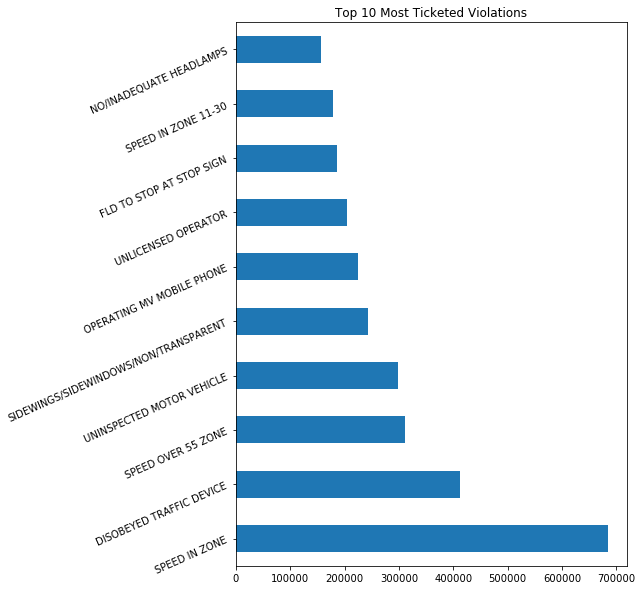

In [118]:
traffic_tickets.Violation.value_counts()[:10].plot(kind="barh", figsize=(7,10), rot=24, title="Top 10 Most Ticketed Violations")

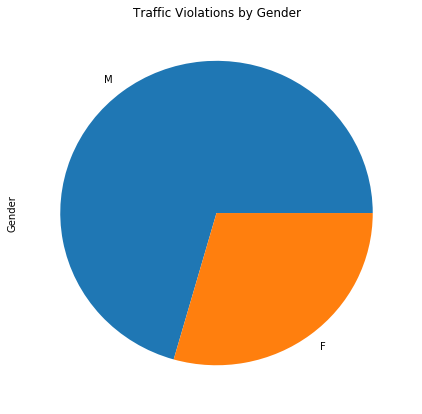

In [149]:
traffic_tickets.Gender.value_counts().plot(kind="pie", figsize=(7,7), title="Traffic Violations by Gender")

(0.0, 450000)

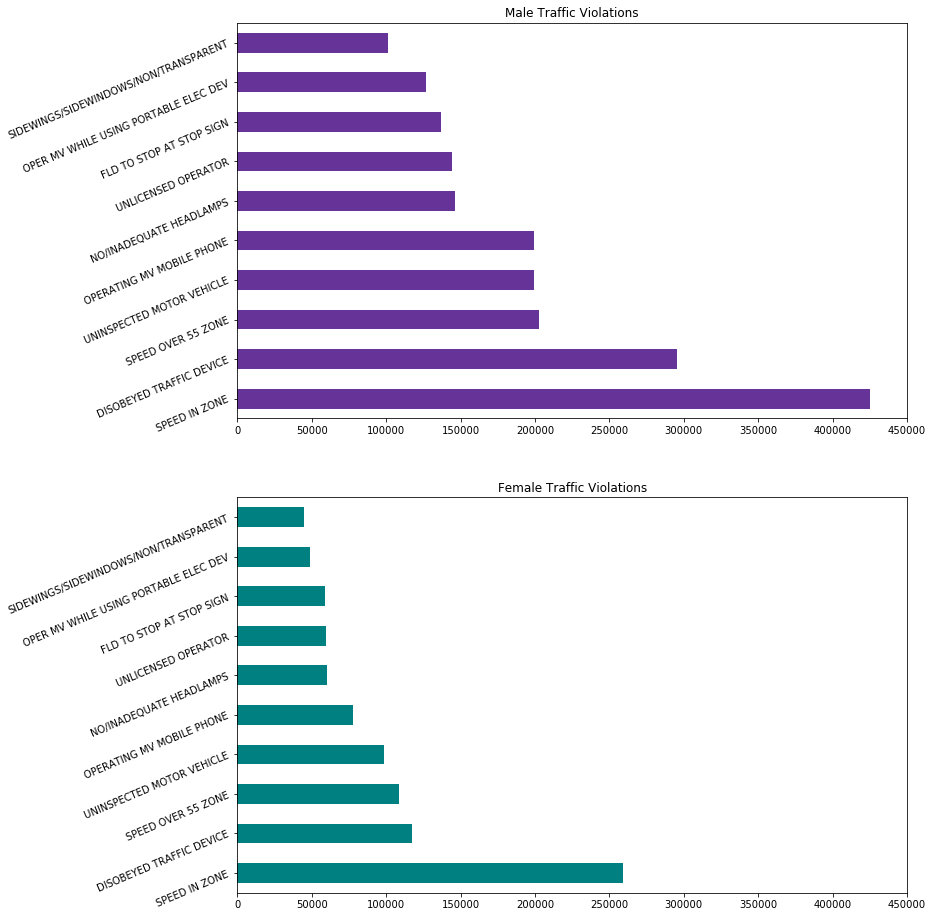

In [148]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(12, 16))

traffic_tickets.loc[traffic_tickets.Gender == "M"] \
    .Violation \
    .value_counts()[:10] \
    .plot(kind="barh", ax=ax1, title="Male Traffic Violations", rot=23, color="#663399") 

traffic_tickets.loc[traffic_tickets.Gender == "F"] \
    .Violation \
    .value_counts()[:10] \
    .plot(kind="barh", ax=ax2, title="Female Traffic Violations", rot=23, color="teal") 
ax1.set_xlim(right=450000)
ax2.set_xlim(right=450000)

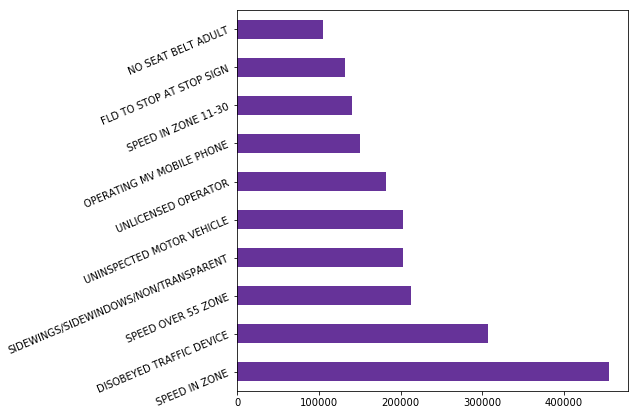

In [13]:
traffic_tickets.loc[traffic_tickets.Gender == "M"] \
    .Violation \
    .value_counts()[:10] \
    .plot(kind="barh", figsize=(7,7), rot=23, color="#663399") 

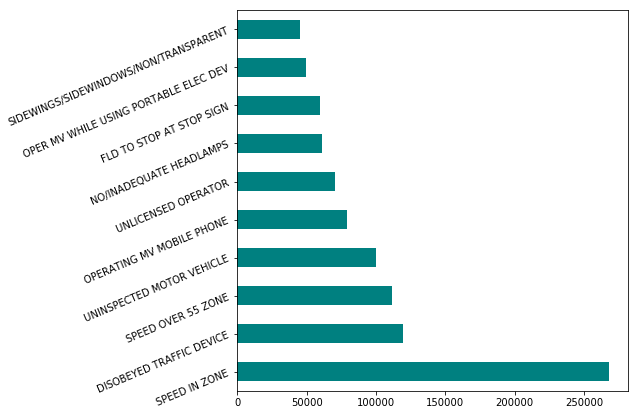

In [64]:
traffic_tickets.loc[traffic_tickets.Gender == "F"] \
    .Violation \
    .value_counts()[:10] \
    .plot(kind="barh", figsize=(7,7), rot=23, color="teal")

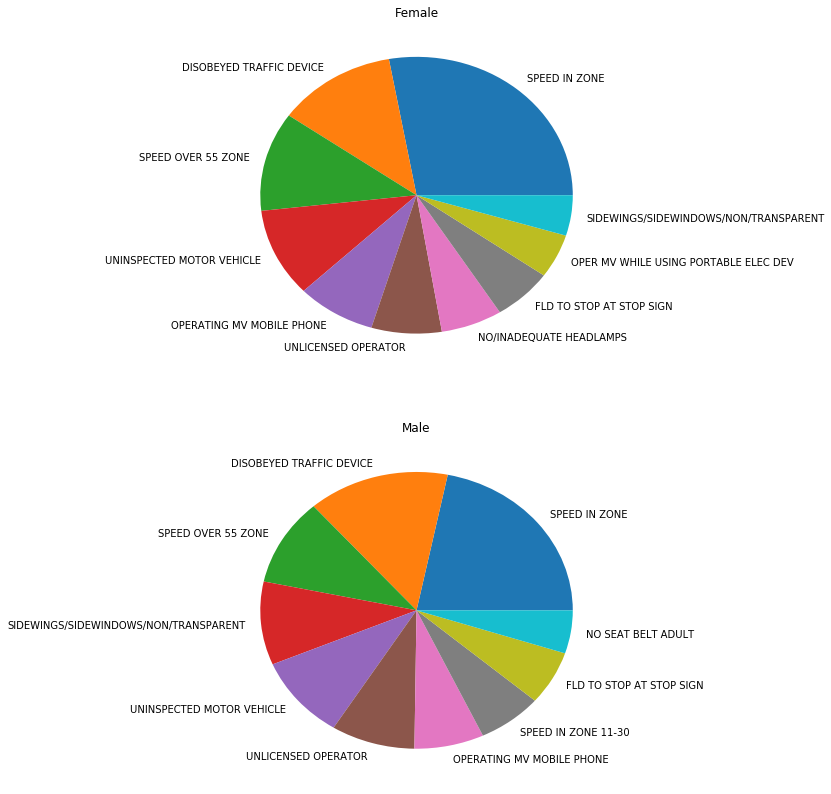

In [96]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(7, 14))
traffic_tickets.loc[traffic_tickets.Gender == "F"] \
    .Violation \
    .value_counts()[:10] \
    .plot(kind="pie", ax=ax1, rot=23, title="Female")

traffic_tickets.loc[traffic_tickets.Gender == "M"] \
    .Violation \
    .value_counts()[:10] \
    .plot(kind="pie", ax=ax2, rot=23, title="Male") 
    
ax1.set_ylabel('')
ax2.set_ylabel('')

In [16]:
age_set = set(traffic_tickets.Age)

In [17]:
len(age_set)

67372

In [19]:
traffic_tickets.Age.mean()

36.63150639531291

In [20]:
traffic_tickets.Age.median()

34.0

In [21]:
traffic_tickets.Age.mode()

0    24.0
dtype: float64

(array([  3.58643000e+05,   8.37276000e+05,   8.56307000e+05,
          7.24647000e+05,   6.10411000e+05,   5.14837000e+05,
          4.42856000e+05,   4.30423000e+05,   3.94801000e+05,
          3.49807000e+05,   2.68862000e+05,   1.83934000e+05,
          1.17310000e+05,   6.84470000e+04,   3.71080000e+04,
          1.87360000e+04,   9.38500000e+03,   4.71200000e+03,
          1.71700000e+03,   5.16000000e+02]),
 array([ 16.  ,  19.95,  23.9 ,  27.85,  31.8 ,  35.75,  39.7 ,  43.65,
         47.6 ,  51.55,  55.5 ,  59.45,  63.4 ,  67.35,  71.3 ,  75.25,
         79.2 ,  83.15,  87.1 ,  91.05,  95.  ]),
 <a list of 20 Patch objects>)

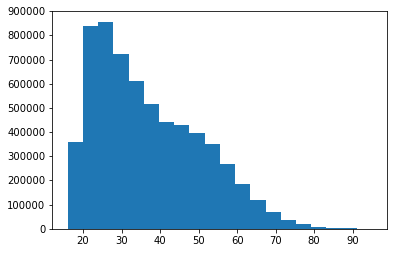

In [22]:
plt.hist(traffic_tickets.Age.dropna(), bins=20)

In [27]:
traffic_tickets.Gender.value_counts()

M    4433132
F    1802023
C      62872
Name: Gender, dtype: int64

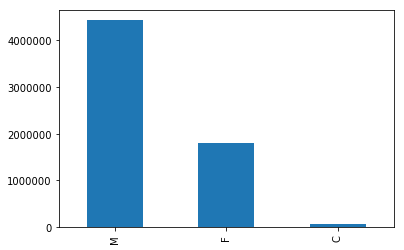

In [44]:
traffic_tickets.Gender.value_counts().plot(kind="bar")

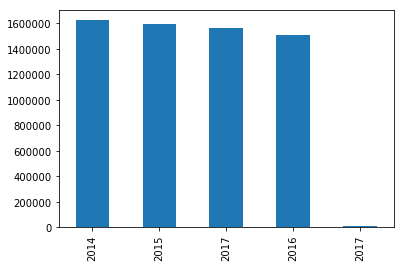

In [45]:
traffic_tickets.Year.value_counts().plot(kind="bar")

In [47]:
set(traffic_tickets.Year)

{2016, 2017, '2017', 2014, 2015}

Well, there seems to be a string in there, so let's convert that to an int.

In [49]:
temp_df = traffic_tickets.replace(to_replace="2017", value=2017)
set(temp_df.Year)

{2014, 2015, 2016, 2017}

Ok, our little test worked, now let's reassign our dframe to this clean one

In [50]:
traffic_tickets = traffic_tickets.replace(to_replace="2017", value=2017)

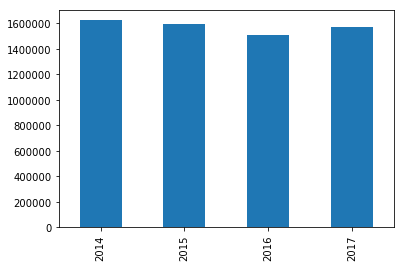

In [67]:
traffic_tickets.Year.value_counts()[[2014, 2015, 2016, 2017]].plot(kind="bar")